In [1]:
#import opencv
import cv2
#import matplotlib
import matplotlib.pyplot as plt  

# jupyter notebook specific to have plots appear in the notebook
%matplotlib inline
#import numpy     
import numpy as np

In [2]:
# code to find version of opencv
cv2.__version__

'4.9.0'

In [3]:
def my_show(ax, img, title=None, interpolation='bicubic', **kwargs):
    ' helper to display an image on an axes without grid/spine '
    ax.imshow(img, interpolation = interpolation, **kwargs)
    ax.axis('off')
    if title:
        ax.set_title(title)

def my_gshow(ax, img, title=None, cmap='gray', interpolation='bicubic', **kwargs):
    ' helper to display an image, in grayscale, on an axes without grid/spine '
    my_show(ax, img, title=title, cmap='gray', interpolation=interpolation, **kwargs)

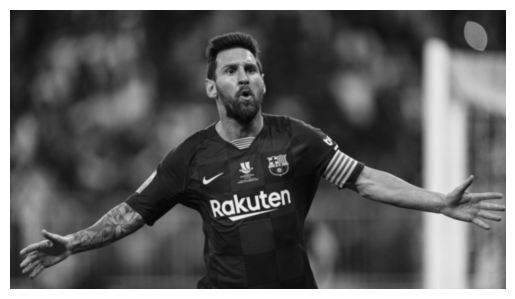

In [6]:
img_dir = 'messi.jpg'
messi_gray = cv2.imread(img_dir, 0)
my_gshow(plt.gca(), messi_gray) # use the default axes for quick-and-dirty

Explain 0 parameter in cv2.imread

In the code snippet messi_gray = cv2.imread(img_dir, 0), the 0 passed as the second argument to cv2.imread is a flag that indicates how the image should be read. Specifically, 0 corresponds to cv2.IMREAD_GRAYSCALE, which tells OpenCV to load the image in grayscale. This means the image will be converted to a single-channel format where each pixel value indicates light intensity, ranging from 0 (black) to 255 (white), rather than having separate channels for red, green, and blue like a color image. By using this flag, we can directly read the image as a grayscale image, making further processing or analysis easier.

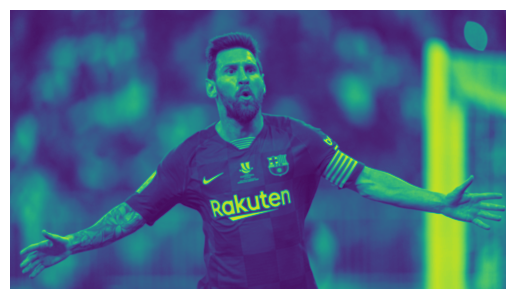

In [7]:
my_show(plt.gca(), messi_gray)

In [8]:


print(type(messi_gray), 
      messi_gray.shape, 
      messi_gray.dtype)



<class 'numpy.ndarray'> (833, 1480) uint8


Explain numpy ndarray <br>
Explain (342,548) <br>
Discuss the range of uint8 <br>

The output <class 'numpy.ndarray'> (833, 1480) uint8 refers to a NumPy array, which is a key data structure in Python used for numerical computations. This specific array is organized in a 2-dimensional format, resembling a table, with 833 rows and 1480 columns. It likely represents an image, where these dimensions correspond to its height and width in pixels. Additionally, the array's data type is uint8, meaning "unsigned 8-bit integer." This indicates that each element in the array can hold a positive integer value between 0 and 255, which is typically used to represent pixel intensities in images, with 0 indicating black and 255 indicating white.

<class 'numpy.ndarray'> (833, 1480, 3) uint8


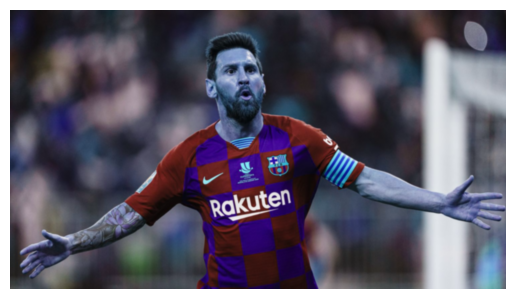

In [10]:

messi_color = cv2.imread(img_dir) # default flag is 1 "color"
print(type(messi_color), 
      messi_color.shape, 
      messi_color.dtype)

my_show(plt.gca(), messi_color)

Discuss the 1 value paramater of the cv2.imread

Explain (342,548,3)

When using cv2.imread to load an image, passing 1 as the second argument indicates that the image should be read in color using the cv2.IMREAD_COLOR flag. This means that the image will be loaded with all its color channels, typically red, green, and blue (RGB). This is reflected in the shape of the resulting NumPy array, (833, 1480, 3). This shape signifies a 3-dimensional array where the first two dimensions (833 and 1480) represent the image's height and width in pixels, respectively. The third dimension, with a size of 3, corresponds to the color channels (RGB). Each element in this 3D array holds a value representing the intensity of a specific color channel for a particular pixel in the image, contributing to the overall color representation.

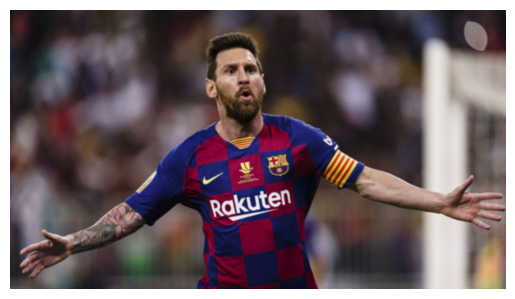

In [11]:
messi_rgb = cv2.cvtColor(messi_color, cv2.COLOR_BGR2RGB)
my_show(plt.gca(), messi_rgb)

Explain BGR <br>
Explain RGB <br>

BGR and RGB are both color models that represent colors digitally, especially in images. The main difference between them lies in the order of the color channels (red, green, and blue) when they are stored and displayed. BGR, which stands for Blue, Green, Red, is the default color format used by OpenCV, a widely-used computer vision library. In this format, the blue channel comes first, followed by green, and then red. Conversely, RGB, which stands for Red, Green, Blue, is the more commonly used color format in various applications and display devices. In RGB, the red channel is stored first, followed by green, and then blue.

In [13]:
def my_read(filename):
    ' read from an image file to an rgb '
    img = cv2.imread(filename)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def my_read_cg(filename):
    ' read from an image file to an rgb and a grayscale image array '
    rgb = my_read(filename)
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    return rgb, gray

def my_read_hsv(filename):
   img = cv2.imread(filename)
   return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

def my_read_gray(filename):
    img = cv2.imread(filename,0)
    return img


# now we can do this:
messi_rgb = my_read(img_dir)

# or if we need both
messi_rgb, messi_gray = my_read_cg(img_dir)

messi_hsv = my_read_hsv(img_dir)
messi_gr = my_read_gray(img_dir)


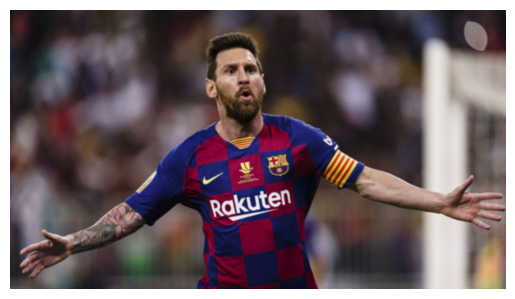

In [14]:
my_show(plt.gca(), messi_rgb)

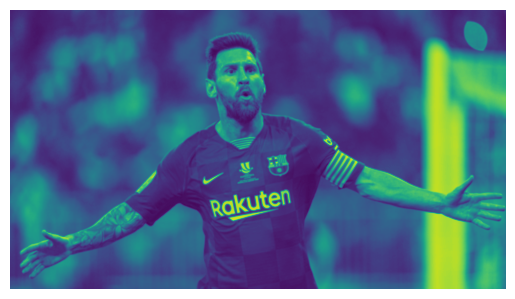

In [15]:
my_show(plt.gca(), messi_gray)

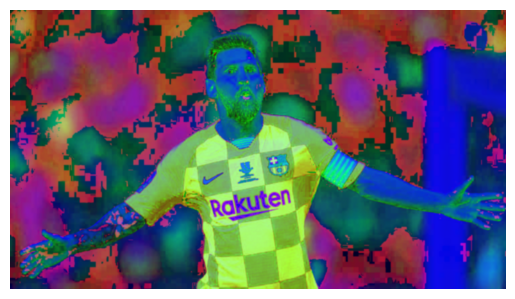

In [16]:
my_show(plt.gca(), messi_hsv)

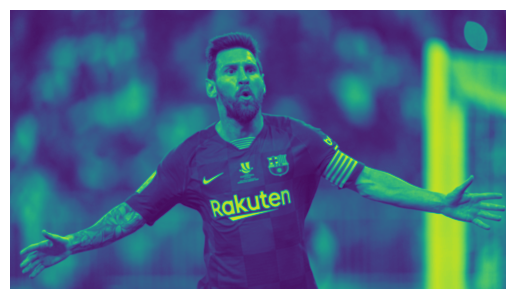

In [17]:
my_show(plt.gca(), messi_gr)

In [19]:
messi_rgb = my_read(img_dir)

In [20]:
messi_rgb

array([[[ 22,  21,  19],
        [ 23,  22,  20],
        [ 23,  22,  20],
        ...,
        [ 42,  34,  45],
        [ 48,  37,  51],
        [ 51,  40,  56]],

       [[ 23,  22,  20],
        [ 23,  22,  20],
        [ 23,  22,  20],
        ...,
        [ 41,  33,  44],
        [ 46,  35,  49],
        [ 48,  37,  53]],

       [[ 23,  22,  20],
        [ 23,  22,  20],
        [ 23,  22,  20],
        ...,
        [ 41,  33,  44],
        [ 44,  36,  49],
        [ 45,  37,  52]],

       ...,

       [[ 83,  83,  83],
        [ 79,  79,  79],
        [ 77,  77,  77],
        ...,
        [112, 103,  96],
        [102,  93,  88],
        [107,  98,  93]],

       [[ 83,  83,  83],
        [ 77,  77,  77],
        [ 76,  76,  76],
        ...,
        [112, 103,  96],
        [104,  95,  90],
        [110, 101,  96]],

       [[ 70,  72,  69],
        [ 75,  77,  74],
        [ 75,  77,  76],
        ...,
        [109, 102,  94],
        [104,  97,  89],
        [106,  99,  91]]

Explain the value inside an image (hint: pixel value) <br>
Explain 0 (hint: color)<br>
Explain 255 (hint:color) <br>
Choose only three values in one row and then explain

In the given array, each element represents a pixel value in the image, which determines the color and intensity of each pixel. In a color image, each pixel is usually represented by three values that correspond to the red, green, and blue (RGB) color channels. For instance, let's examine the first row and look at the first three pixel values: [22, 21, 19]. These values indicate the intensity of the red, green, and blue channels for that particular pixel. A value of 0 typically signifies the absence of that color, resulting in black, while a value of 255 indicates the highest intensity of that color. In this case, the pixel with values [22, 21, 19] would appear as a very dark shade, nearly black, since the values are quite low for all three color channels. Higher values in any of the color channels would produce brighter and more vibrant shades, ultimately contributing to the diverse range of colors we observe in an image.

In [21]:
messi_gray

array([[ 21,  22,  22, ...,  38,  42,  45],
       [ 22,  22,  22, ...,  37,  40,  42],
       [ 22,  22,  22, ...,  37,  40,  41],
       ...,
       [ 83,  79,  77, ..., 105,  95, 100],
       [ 83,  77,  76, ..., 105,  97, 103],
       [ 71,  76,  76, ..., 103,  98, 100]], dtype=uint8)

Explain the difference of messi_color from messi_gray)

The main difference between messi_color and messi_gray is in how they handle image data. messi_color stores the image in full color, which means it includes information for three color channels—red, green, and blue—for each pixel. This allows for a rich representation of the image, capturing various hues and shades. In contrast, messi_gray stores the image in grayscale, containing just one intensity value per pixel that indicates brightness or luminance. This results in a black-and-white image, where each pixel's value determines its shade of gray, ranging from 0 (black) to 255 (white). Essentially, messi_gray eliminates the color details found in messi_color, concentrating only on the light intensity at each pixel, which produces a grayscale version of the image. This is clear in the array for messi_gray, which shows a single value for each pixel, while a color image would display three values per pixel for the RGB channels.


In [22]:
print(messi_rgb[100,100],     # access a pixel
      messi_rgb[300,:].shape) # sub-select a row; it's an array also.  take its shape

[30 26 27] (1480, 3)


In [23]:
# pixels  arrays too
pixel = messi_rgb[100,100]
print(type(pixel),
      pixel.shape,  # 1-D, scalar, array
      pixel)

<class 'numpy.ndarray'> (3,) [30 26 27]


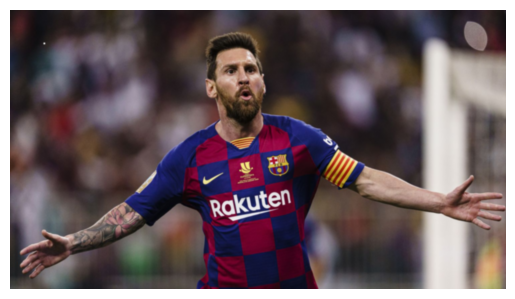

In [24]:
# massi's right wrist has a white spot!
messi_rgb[100:105,100:105]=[255,255,255] # white (note, our target pixel also had 3 spots to fill)
my_show(plt.gca(), messi_rgb)

Choose one human face and replace it with white box color (any color)

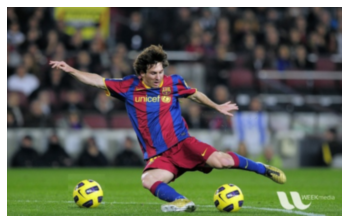

In [ ]:
ball_soi = messi_rgb[280:340, 330:390] # "soi" = square of interest :)
messi_rgb[273:333, 100:160] = ball_soi  # copy to new area
my_show(plt, messi_rgb)

Choose one object on your image and then replicate it to another location

In [25]:
# often we want to access color channels separately
# split to separate arrays per color (costly, prefer to access by indexing)
chans = r,g,b = cv2.split(messi_rgb)
restored = cv2.merge((r,g,b))

print(r.shape)

(833, 1480)


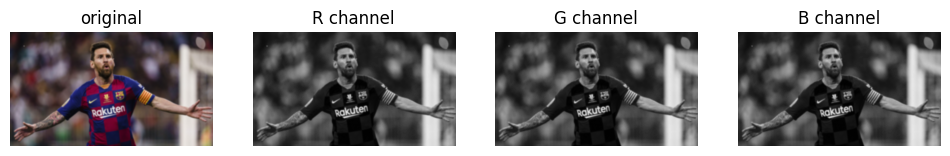

In [26]:
fig, axes = plt.subplots(1,4,figsize=(12,3))
axes = axes.flat

# handle first as special case
first_axis = next(axes)
my_show(first_axis, messi_rgb)
first_axis.set_title("original")

# display per channel images
for ax, ch, name in zip(axes, chans, ["R", "G", "B"]):
    my_gshow(ax, g)
    ax.set_title("{} channel".format(name))

In [27]:
# cv2.split is a convenience wrapper around numpy's split command
# aka, split on last axis into size(last axis) pieces
r_np,_,_ = np.split(messi_rgb, messi_rgb.shape[-1], -1) 
print(r_np.shape,
      np.allclose(r, r_np[:,:,0])) # only 1D in last axis, so index it out

(833, 1480, 1) True


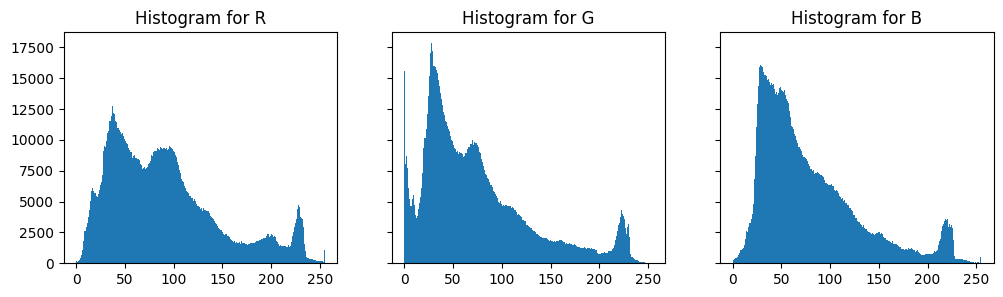

In [28]:
# we can often just use indexing directly (see line 9)
# also show off matplotlib histograms

color_to_index = {"R":0, "G":1, "B":2}  # map strings to appropriate index in 

fig, axes = plt.subplots(1,3,figsize=(12,3), sharey=True)
for ax, color in zip(axes, color_to_index):
    c = color_to_index[color]
    this_channel = messi_rgb[:,:,c].ravel() # 1D view without copying 
    
    ax.hist(this_channel, 256)
    ax.set_title("Histogram for {}".format(color))

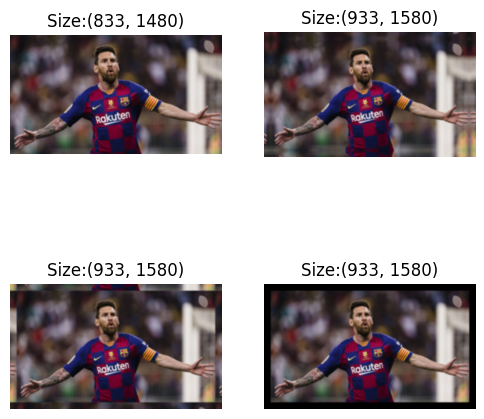

In [30]:
fig, axes = plt.subplots(2,2,figsize=(6,6))
axes = axes.flat

messi = my_read(img_dir)
my_show(next(axes), messi, title="Size:{}".format(messi.shape[:2]))

borders = [cv2.BORDER_REFLECT, cv2.BORDER_WRAP, cv2.BORDER_CONSTANT]
for ax, border in zip(axes, borders):
    with_border = cv2.copyMakeBorder(messi, 50,50,50,50,border)
    my_show(ax, with_border, title="Size:{}".format(with_border.shape[:2]))